# GEO1003 ~ Wi-Fi Fingerprinting

December 2023

Work by Tom Barbian (5100704), Der Derian Auliyaa Bainus (5941342), Corné Snoeij (5174473), Javier Martínez (6055613)

### Importing libraries

In [344]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

### Loading the data

##### Wi-Fi fingerprinting data

In [315]:
# load the files within folder /data/fingerprints into a list
wifi_path = os.getcwd() + '/data/fingerprints'
wifi_files = os.listdir(wifi_path)
wifi_files

['library.txt',
 'K1.OOST.240.txt',
 '.DS_Store',
 '02west610.txt',
 'Orange_room.txt',
 'BG_oost_430.txt',
 'K.txt',
 'Geolab.txt',
 'H.txt',
 'Canteen.txt',
 'Z.txt',
 'M.txt',
 'BGhalf_floor.txt',
 'Entrance_West.txt',
 'Management_Stairs.txt',
 'C.txt',
 'T.txt',
 'U.txt',
 'B.txt',
 'Coffee_Corner.txt',
 'Canteen_Side_Room.txt',
 'Student_service.txt',
 'V.txt',
 'A.txt',
 'Serre.txt',
 'R.txt',
 'stairway_near_U.txt',
 'D.txt',
 'Q.txt',
 'F.txt',
 'bkshop.txt',
 'Hallway_beside_urbanism.txt',
 'P.txt',
 'BG.OOSt.060.txt',
 'vrlab.txt',
 '330.txt']

In [316]:
# load the files into a list of dataframes
df_dict = {}

for file in wifi_files:
    try:
        df_dict[file] = pd.read_csv(wifi_path + '/' + file, sep='\t', header=0)
        df_dict[file].rename(columns={df_dict[file].columns[0]: "timestamp"}, inplace=True)
        df_dict[file].insert(0, 'room', file)

    except Exception as e:
        print(f"error reading file {file}: {e}")
        continue

error reading file .DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte


In [317]:
len(df_dict)

35

In [318]:
df_dict['Z.txt']

,room,timestamp,MAC Address,Vendor,SSID,Access Point Name,Connected AP,Signal Strength,Quality,Station Count,Frequency,Position,Info,Adapter
0,Z.txt,12/12/2023 13:22:50,D0:4D:C6:F2:45:D1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-88,20,0.0,Ch 56 [5.280 GHz],NaN,"0 Stations, 14% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
1,Z.txt,12/12/2023 13:22:50,D0:4D:C6:F2:B9:C1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-77,46,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 13% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
2,Z.txt,12/12/2023 13:22:50,D0:4D:C6:F2:9A:61,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-80,38,0.0,Ch 1 [2.412 GHz],NaN,"0 Stations, 28% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
3,Z.txt,12/12/2023 13:22:50,D0:4D:C6:F2:B9:B2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-83,31,0.0,Ch 40 [5.200 GHz],NaN,"0 Stations, 8% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
4,Z.txt,12/12/2023 13:22:50,1C:28:AF:5B:8E:F2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-81,35,0.0,Ch 56 [5.280 GHz],NaN,"0 Stations, 17% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19906,Z.txt,12/12/2023 13:40:55,D0:4D:C6:F2:B9:A0,"Aruba, a Hewlett Packard Enterprise Company",eduroam,NaN,NaN,-84,29,0.0,Ch 11 [2.462 GHz],NaN,"0 Stations, 14% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19907,Z.txt,12/12/2023 13:40:55,1C:28:AF:5C:43:F1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-83,31,0.0,Ch 112 [5.560 GHz],NaN,"0 Stations, 7% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19908,Z.txt,12/12/2023 13:40:55,D0:4D:C6:F2:92:C1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-83,31,1.0,Ch 1 [2.412 GHz],NaN,"1 Station, 40% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19909,Z.txt,12/12/2023 13:40:55,D0:4D:C6:F2:4F:D2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-88,20,0.0,Ch 40 [5.200 GHz],NaN,"0 Stations, 19% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]


##### GNSS nmea data

In [319]:
# This function was coded by Lars, but modified to save to dataframe

def get_sat_values(filename):
    PDOP, HDOP, VDOP, latitude, longitude, num_used_satellites, altitude = [], [], [], [], [], [], []

    with open(filename, 'r') as file:
        lines = file.readlines()
        # divide messages
        messages = [lines[i:i + 7] for i in range(0, len(lines), 7)]

        for message in messages:
            PDOP.append(float(message[0].split(',')[15]))
            HDOP.append(float(message[0].split(',')[16]))
            VDOP.append(float(message[0].split(',')[17][:3]))
            latitude.append(float(message[6].split(',')[2:3][0]))
            longitude.append(float(message[6].split(',')[4:5][0]))
            num_used_satellites.append(int(message[6].split(',')[6]))
            altitude.append(float(message[6].split(',')[9:10][0]))

    # Create a DataFrame
    df = pd.DataFrame({
        'PDOP': PDOP,
        'HDOP': HDOP,
        'VDOP': VDOP,
        'latitude': latitude,
        'longitude': longitude,
        'num_used_satellites': num_used_satellites,
        'altitude': altitude
    })

    return df

In [320]:
# load the files within folder /data/fingerprints into a list
nmea_path = os.getcwd() + '/data/nmea'
nmea_files = os.listdir(nmea_path)
nmea_files

['Hall H nmea.log',
 'Stairway (near Hall U) nmea.log',
 'Hall Z nmea.log',
 'Hall K nmea.log']

In [321]:
# load the nmea files into a list of dataframes
nmea_dict = {}

for file in nmea_files:
    nmea_dict[file] = get_sat_values(nmea_path + '/' + file)
    # divide latitude and longitude by 100 to get the correct value
    nmea_dict[file]['latitude'] = nmea_dict[file]['latitude'] / 100
    nmea_dict[file]['longitude'] = nmea_dict[file]['longitude'] / 100
    nmea_dict[file]['ID'] = file

In [322]:
nmea_dict['Hall K nmea.log']

,PDOP,HDOP,VDOP,latitude,longitude,num_used_satellites,altitude,ID
0,11.2,10.5,3.8,52.003689,4.222611,12,1.1,Hall K nmea.log
1,7.7,7.0,3.2,52.003696,4.222625,12,1.0,Hall K nmea.log
2,7.5,7.0,2.8,52.003697,4.222627,12,1.0,Hall K nmea.log
3,7.5,7.0,2.6,52.003697,4.222627,12,1.1,Hall K nmea.log
4,7.4,7.0,2.3,52.003697,4.222627,12,1.0,Hall K nmea.log
...,...,...,...,...,...,...,...,...
166,7.0,7.0,0.5,52.003688,4.222605,12,1.3,Hall K nmea.log
167,7.0,7.0,0.5,52.003692,4.222613,12,1.3,Hall K nmea.log
168,7.0,7.0,0.5,52.003701,4.222623,12,1.3,Hall K nmea.log
169,7.0,7.0,0.5,52.003701,4.222625,12,1.3,Hall K nmea.log


### A. Radio Mapping Phase

BK-City floor plan can be found [here.](https://www.tudelft.nl/bk/over-faculteit/het-gebouw/plattegrond/)

##### A1. Scatterplots of GNSS accuracy
Illuminate the estimated GNSS accuracy of this indoor location through a visual representation in
a scatterplot. Don't forget to include key metrics like standard deviation, HDOP, and VDOP.

In [323]:
def print_statistics(dict):
    # Create table with mean, std of lat, lon, HDOP, VDOP, PDOP for each measurement
    statistics_dfs = []
    for key, value in dict.items():
        # Calculate the mean and std for each dataframe
        statistics_df = value.groupby('ID').agg({
            'latitude': ['mean', 'std'],
            'longitude': ['mean', 'std'],
            'HDOP': ['mean', 'std'],
            'VDOP': ['mean', 'std'],
            'PDOP': ['mean', 'std']
        }).reset_index()
        # Add the measurement name to the dataframe at first column
        statistics_df.insert(0, 'measurement', key)
        statistics_dfs.append(statistics_df)

    result_df = pd.concat(statistics_dfs, axis=0)
    result_df = result_df.drop(columns=['ID'], level=0)

    return result_df

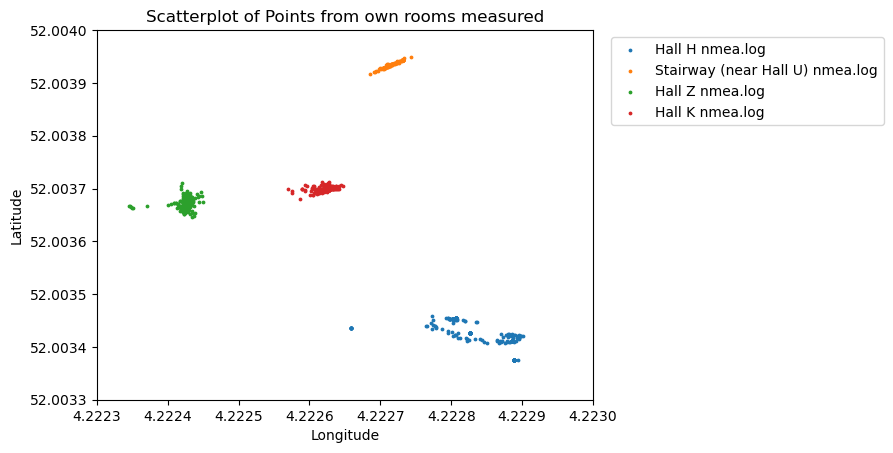

In [324]:
# plot latitude and longitude for each of the nmea files in one scatterplot with different colors
for key, df in nmea_dict.items():
    plt.scatter(df['longitude'], df['latitude'], label=key, s=3)

plt.xlim(4.2223, 4.223)
plt.ylim(52.0033, 52.004)

# ctx.add_basemap(plt.gca(), crs='epsg:4326', source=ctx.providers.OpenStreetMap.Mapnik, zoom=19)

plt.ticklabel_format(useOffset=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Points from own rooms measured')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
# plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [325]:
print("Statistics table")
print_statistics(nmea_dict)

Statistics table


measurement   latitude           longitude            \
                                         mean       std      mean       std   
0                  Hall H nmea.log  52.003425  0.000023  4.222848  0.000044   
0  Stairway (near Hall U) nmea.log  52.003934  0.000007  4.222715  0.000012   
0                  Hall Z nmea.log  52.003673  0.000011  4.222423  0.000015   
0                  Hall K nmea.log  52.003700  0.000004  4.222622  0.000013   

       HDOP                VDOP                PDOP            
       mean       std      mean       std      mean       std  
0  1.667746  1.327621  0.475777  0.465847  1.771632  1.368019  
0  7.193913  0.744723  1.138261  0.664723  7.292174  0.815007  
0  7.155618  0.860690  1.206180  0.783600  7.280337  0.935735  
0  7.020468  0.267652  0.815205  0.505386  7.069006  0.332952

##### A2. Comparison of Wi-Fi fingerprinting from two proximate (geographically) locations
Gauge the degree of similarity between these fingerprints. Alternatively, on a broader scale, assess
the 'distance' between the 32 identifiable places in RSS-space. In essence, explore how
distinguishable these places are from each other.

We would like to assess the degree of similarity between two rooms: ROOM M and ROOM H, those rooms are next to each other in the BK building. First we show the averages of each of their two fingerprints.

In [326]:
# Extract Wi-Fi fingerprints for the two rooms
hall_m_df = df_dict['M.txt']
hall_h_df = df_dict['H.txt']

# Select relevant columns for comparison
selected_columns = ['Signal Strength', 'Quality', 'Station Count']

# Handling NaN values by filling them with the mean of the column
hall_m_df = hall_m_df[selected_columns].fillna(hall_m_df[selected_columns].mean())
hall_h_df = hall_h_df[selected_columns].fillna(hall_h_df[selected_columns].mean())

# Extract features for halls M and H
hall_m_features = hall_m_df[selected_columns].to_numpy()
hall_h_features = hall_h_df[selected_columns].to_numpy()

# Calculate averages and standard deviations
hall_m_avg = hall_m_df.mean()
hall_h_avg = hall_h_df.mean()
hall_m_std = hall_m_df.std()
hall_h_std = hall_h_df.std()

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'Hall M Avg': hall_m_avg,
    'Hall H Avg': hall_h_avg,
    'Hall M Std': hall_m_std,
    'Hall H Std': hall_h_std
})

# Display the dataframe
comparison_df

,Hall M Avg,Hall H Avg,Hall M Std,Hall H Std
Signal Strength,-75.262687,-74.924231,9.871511,10.497912
Quality,50.408012,50.614977,22.616157,23.772682
Station Count,0.544799,1.650607,1.552446,3.955809



We can also visualize a plot of the average strength of the signal for both rooms.

First twe get for all dataframes the 10 strongest signals.

In [379]:
from scipy.spatial.distance import pdist, squareform

/var/folders/cv/5rqmb3q17bd8n1sw4sszb5gm0000gn/T/ipykernel_19179/1559785992.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['room'] = all_data['room'].str.replace('.txt', '')


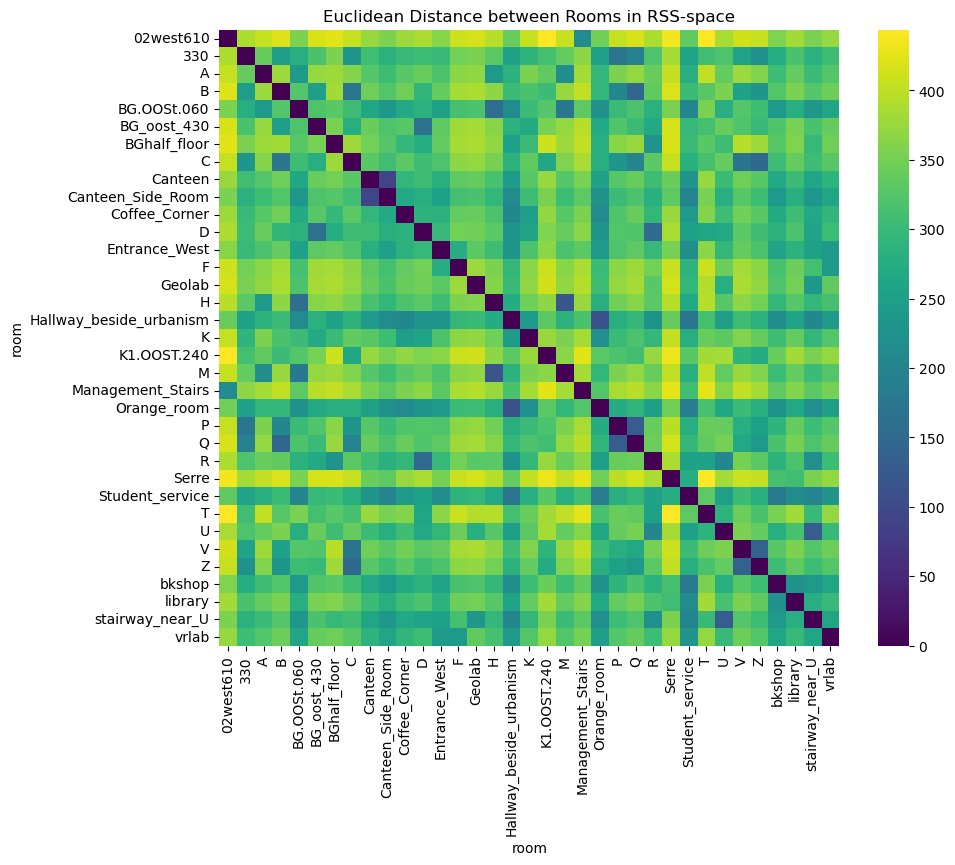

In [383]:
# Assuming df_dict is a dictionary where keys are room numbers and values are DataFrames
all_data = pd.concat([df.assign(room=room) for room, df in df_dict.items()])
# remove .txt in room column of all_data
all_data['room'] = all_data['room'].str.replace('.txt', '')

# Pivot the DataFrame
pivot_df = all_data.pivot_table(index='room', columns='MAC Address', values='Signal Strength', fill_value=-100) # -dBm as indication of weak signal

# Calculate Euclidean distances
distances = pdist(pivot_df.values, metric='euclidean')
distance_matrix = squareform(distances)

# Convert to a DataFrame for easier handling
distance_df = pd.DataFrame(distance_matrix, index=pivot_df.index, columns=pivot_df.index)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, cmap='viridis', annot=False)
plt.title('Euclidean Distance between Rooms in RSS-space')
plt.savefig('Euclidean Distance between Rooms in RSS-space.png', dpi=300, bbox_inches='tight')
plt.show()


In [160]:
# Get the 10 strongest signals for each room
df_dict['M.txt'].groupby(["MAC Address"]).agg({'room': 'first',
                                     'Signal Strength': 'mean'}).sort_values(by='Signal Strength', ascending=True)[:5].reset_index()

,MAC Address,room,Signal Strength
0,00:1E:42:4C:89:FC,M.txt,-90.937500
1,1C:28:AF:62:B8:B2,M.txt,-89.620690
2,D0:4D:C6:F2:F4:B1,M.txt,-89.552632
3,1C:28:AF:62:B8:B0,M.txt,-89.382353
4,D0:4D:C6:F2:F4:B2,M.txt,-89.011905


In [163]:
result_df = pd.DataFrame(columns=['room', 'vector'])

def get_resulting_data(df):
    df = df.groupby(["MAC Address"]).agg({'room': 'first',
                                     'Signal Strength': 'mean'}).sort_values(by='Signal Strength', ascending=True)[:10].reset_index()
    df['Signal Strength'] = df['Signal Strength'].abs()
    vector = df.apply(lambda row: list(row[['MAC Address', 'Signal Strength']].to_dict().values()), axis=1).tolist()
    result_df = result_df.append({'room': df['room'].iloc[0], 'vector': vector_list}, ignore_index=True)
    return df

# Loop over df_dict and create df_dict_strongest
df_dict_strongest = {}
for key, value in df_dict.items():
    df_dict_strongest[key] = get_resulting_data(value)

In [164]:
df_dict_strongest['M.txt']

[['00:1E:42:4C:89:FC', 90.9375],
 ['1C:28:AF:62:B8:B2', 89.62068965517241],
 ['D0:4D:C6:F2:F4:B1', 89.55263157894737],
 ['1C:28:AF:62:B8:B0', 89.38235294117646],
 ['D0:4D:C6:F2:F4:B2', 89.01190476190476],
 ['D0:4D:C6:F2:F4:B0', 88.97575757575757],
 ['1C:28:AF:61:E3:B2', 88.61538461538461],
 ['1C:28:AF:61:E3:B1', 88.37278106508876],
 ['1C:28:AF:61:E3:B0', 88.20710059171597],
 ['D0:4D:C6:F2:B9:A0', 88.04]]

In [154]:
df_dict_strongest['M.txt']

,MAC Address,room,Signal Strength
0,00:1E:42:4C:89:FC,M.txt,90.937500
1,1C:28:AF:62:B8:B2,M.txt,89.620690
2,D0:4D:C6:F2:F4:B1,M.txt,89.552632
3,1C:28:AF:62:B8:B0,M.txt,89.382353
4,D0:4D:C6:F2:F4:B2,M.txt,89.011905
5,D0:4D:C6:F2:F4:B0,M.txt,88.975758
6,1C:28:AF:61:E3:B2,M.txt,88.615385
7,1C:28:AF:61:E3:B1,M.txt,88.372781
8,1C:28:AF:61:E3:B0,M.txt,88.207101
9,D0:4D:C6:F2:B9:A0,M.txt,88.040000


In [138]:
avg_signal_H = df_dict_strongest['H.txt'].groupby('MAC Address')['Signal Strength'].mean()
avg_signal_M = df_dict_strongest['M.txt'].groupby('MAC Address')['Signal Strength'].mean()

merged_df = pd.merge(avg_signal_H, avg_signal_M, on='MAC Address', suffixes=('_H', '_M'), how='outer')
merged_df

,Signal Strength_H,Signal Strength_M
MAC Address,,
1C:28:AF:61:E3:B0,88.274112,88.207101
1C:28:AF:61:E3:B1,88.224242,88.372781
1C:28:AF:61:E3:B2,88.347619,88.615385
32:C3:D9:4D:6A:19,89.000000,NaN
BC:F2:AF:D7:7C:66,88.616822,NaN
D0:4D:C6:F2:3A:A1,88.000000,NaN
D0:4D:C6:F2:98:D0,87.650224,NaN
D0:4D:C6:F2:D4:D0,88.596413,NaN
D0:4D:C6:F2:D4:D1,87.762332,NaN


/Users/nelis/anaconda3/envs/geomatics/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

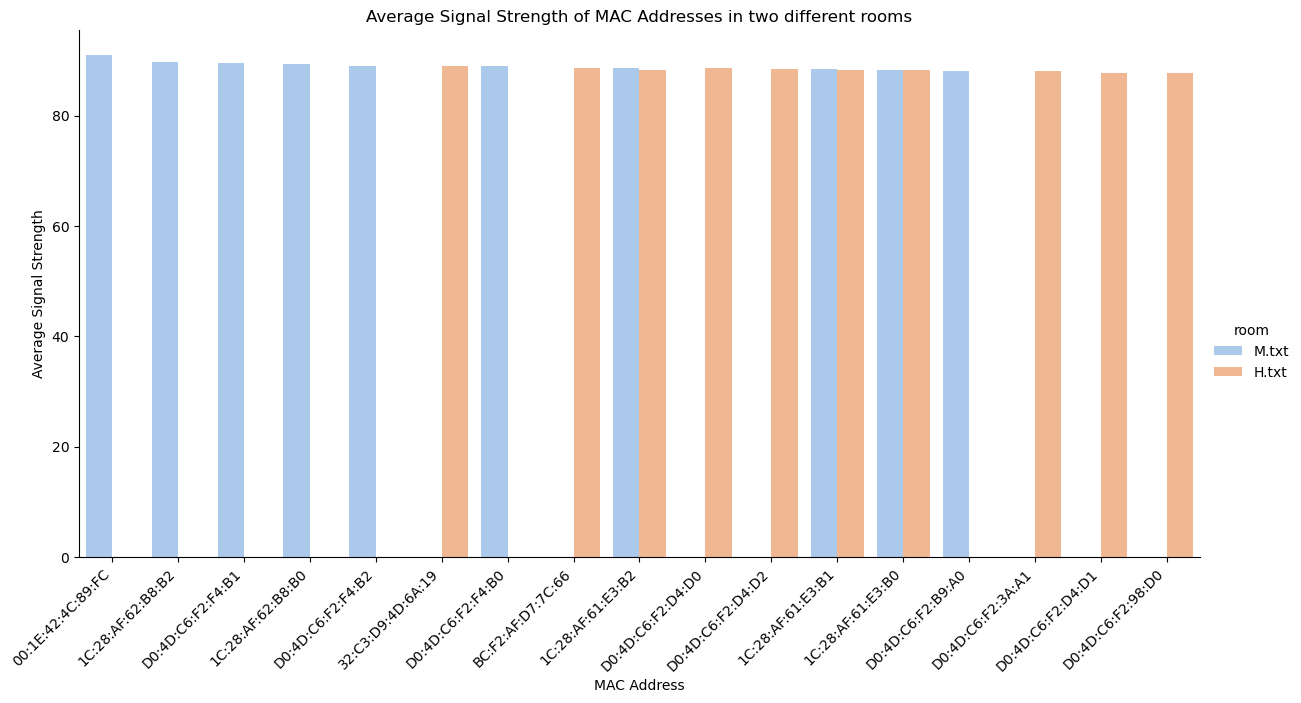

In [139]:
combined_data = pd.concat([df_dict_strongest['M.txt'], df_dict_strongest['H.txt']]).sort_values(by='Signal Strength', ascending=False)

plt.figure(figsize=(10, 6))
sns.catplot(x='MAC Address', y='Signal Strength', hue='room', kind='bar', data=combined_data, height=6, aspect=2, palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.xlabel('MAC Address')
plt.ylabel('Average Signal Strength')
plt.title('Average Signal Strength of MAC Addresses in two different rooms')
plt.savefig('grouped.png', dpi=300, bbox_inches='tight')
plt.show()

Also, we can assess the 'distance' between the rooms in RSS-space by using KNN clustering. It is performed below.

In [289]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

df_list = list(df_dict.values())

# Concatenate all DataFrames into one
df = pd.concat(df_list)

# Drop rows with NaN values
df.dropna(subset=['Signal Strength', 'Quality', 'Station Count'], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(df[['Signal Strength', 'Quality', 'Station Count']])

In [290]:
# Assuming you want 32 clusters (rooms)
kmeans = KMeans(n_clusters=32, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

/Users/cornelis/opt/anaconda3/envs/abm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


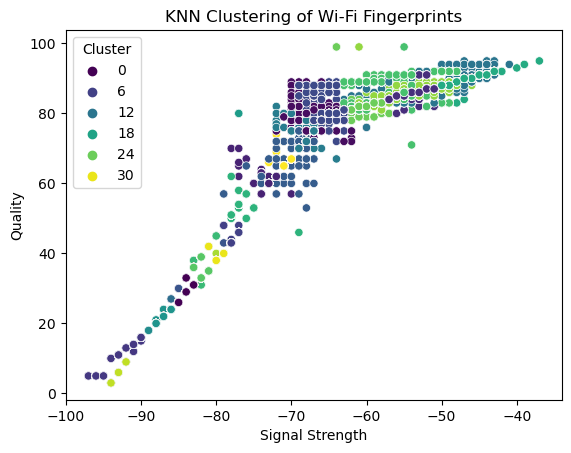

In [291]:
# Visualize clusters in 2D (you can choose different features for x and y)
sns.scatterplot(x='Signal Strength', y='Quality', hue='Cluster', data=df, palette='viridis')
plt.title('KNN Clustering of Wi-Fi Fingerprints')
plt.show()

NameError: name 'X_scaled' is not defined

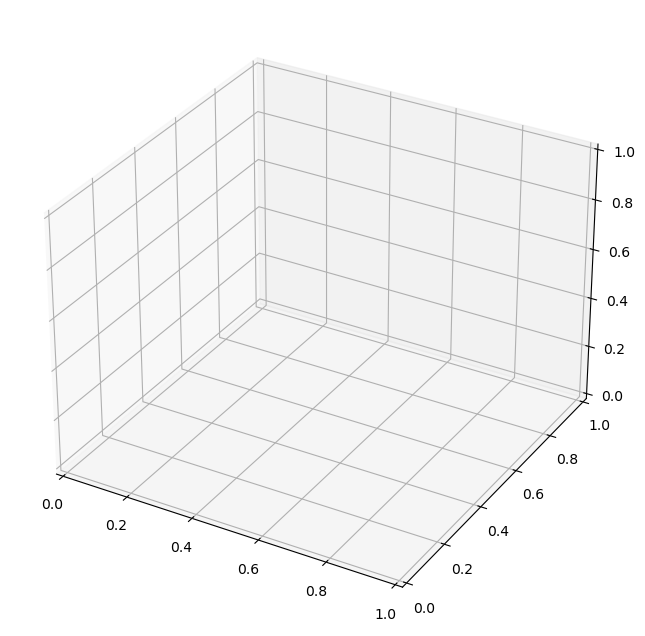

In [288]:
from mpl_toolkits.mplot3d import Axes3D

# Assume 'Frequency' is the third dimension
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualize clusters in 3D
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis', s=20)

# Add labels
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Quality')
ax.set_zlabel('Station Count')

# Add a colorbar
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.title('3D KNN Clustering of Wi-Fi Fingerprints')
plt.show()


{}

In [313]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preprocess and combine data
combined_data = pd.concat(df_dict.values(), ignore_index=True)
# Drop rows with NaN values
combined_data.dropna(subset=['Signal Strength', 'Quality', 'Station Count'], inplace=True)

# Feature selection
features = ['Signal Strength', 'Quality', 'Station Count']
X = combined_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assign labels based on room names
y = combined_data['room']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_model.predict(X_test)

# Assess the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.1574007106694758
